
# Community detection


Estudiaremos el algoritmo Louvain para Detección de Comunidades aplicado al dataset de grafos "Enron email network".


We will study the Louvain algorithm for Community Detection applied to the "Enron email network" graph dataset.


## Dataset

- We will work with the graph dataset **"Enron email network"**, which contains the interactions via email of 36,692 workers of the US energy company "Enron".
-  This dataset is contained in the attached file "Email-Enron.txt" in which all the email pairs of said company are listed between which at least one message has been sent.
-  The file contains 183831 lines, which correspond to the total number of undirected edges of the graph and its format per line is:


#Nodo_origen -> #Nodo_destino.

## Community Detection


The **Community Detectio** problem is a fundamental problem in network analysis and consists of searching for groups of nodes that have certain properties in common and that, therefore, are more similar to each other than to other nodes. We call these sets of nodes "communities".

 If we model the interactions of a set of people in a certain context as a graph, we would have the nodes correspond to the people and the edges to the interactions between them. In this context, we can define a community as a subset of nodes in the graph that are densely connected to each other and loosely connected to nodes in other communities within the graph.

 For this, we can use the Louvain Community Detection algorithm to perform Clustering on graphs, in which the clusters obtained will correspond to the communities within the graph.



## Louvain algorithm



It is an algorithm for detecting communities in complex networks or graphs, devised in 2008 by researchers at the Catholic University of Belgium, whose objective is to maximize the modularity of a graph.



What is modularity? It is a measure that compares the number of edges inside and outside the community, which is expressed by the following equation for weighted graphs:


\begin{equation*}
    Q = \dfrac{1}{2m} \sum_{i,j} [ A_{ij} - \dfrac{k_{i}k_{j}}{2m}] \delta (c_{i}, c_{j})
\end{equation*}

 Where:
-  $A_{ij}$ is the weight of the edge between $i$ and $j$
-  $k *{i}$, $k* {j}$ are the sum of the weights of the edges connected to nodes i and j respectively
-  $m$ is the sum of all the weights of the edges in the graph
-  $\delta$ is the Kronecker delta function. Which is 1 if $x = y$ and 0 otherwise.
-  $Q \in [-1,1]$



To optimize modularity, the algorithm performs the following steps:
1.  Initially, each node constitutes a community.
1.  Then, a node is selected at random and it is evaluated if the partition has better modularity by assigning said node to the community of one of its neighbors.
1.  If the modularity of the current partition is better, the node stays in its community.
1.  If the modularity of the partition when assigning the node to one of its neighbors is better, that node is assigned to the community of that neighbor.
1.  Nodes are selected at random and the previous steps are carried out until the partitions obtained in two consecutive steps are equal.



> For this implementation, we will use the [Python-Louvain](https://github.com/taynaud/python-louvain) library (*read documentation and installation steps*). In addition, we will use the networkx library to create the graph.


In [13]:
# Libraries
import community as community_louvain
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt



## Steps to follow


1. Load the dataset into a networkx graph.
1.  Apply the Louvain algorithm for Clustering in the graph.
1.  Generate a new file "out.txt" with the nodes labeled.
1.  Show graphically 5 communities. It doesn&#39;t matter if these communities are connected to each other.


In [14]:
# Implementation
FileName = "Email-Enron.txt"
Graphtype = nx.Graph()  # use net.Graph() for undirected graph

# How to read from a file. Note: if your egde weights are int,
# change float to int.
G = nx.read_edgelist(
    FileName, create_using=Graphtype, nodetype=int, data=(("weight", float),)
)

partition = community_louvain.best_partition(G)

for node in partition:
    G.nodes[node]["cluster"] = partition[node]
nx.write_gml(G, "out.txt")


In [15]:
selected_communities = [0, 1, 2, 3, 4]
selected_nodes = []
selected_colors = []
for i, j in partition.items():
    if j in selected_communities:
        selected_nodes.append(i)
        selected_colors.append(j + 1)
selected = G.subgraph(selected_nodes)
pos = nx.spring_layout(selected)


In [16]:
clusters = nx.get_node_attributes(selected, "cluster").values()
cmap = cm.get_cmap("viridis", max(clusters) + 1)


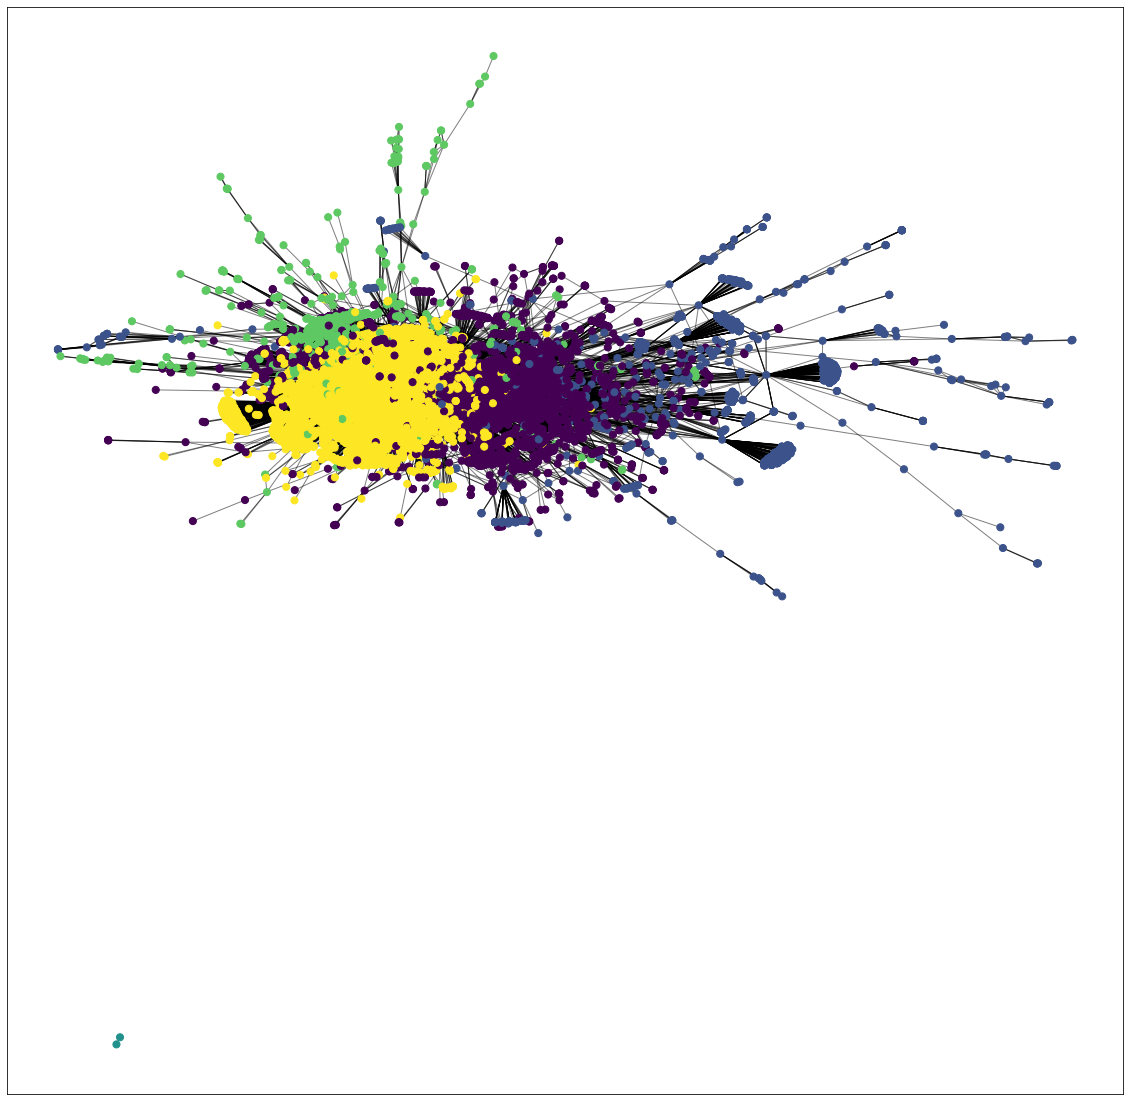

In [17]:
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    selected, pos, node_size=50, cmap=cmap, node_color=list(clusters)
)
nx.draw_networkx_edges(selected, pos, alpha=0.5)
plt.show()



It is observed that the result is consistent, communities are made up of people who interact considerably.
